In [1]:
from torch.nn import Parameter
import torch.nn.functional as F
import torch

import os, sys
project_root_dir = os.path.join(os.getcwd(),'../..')
if project_root_dir not in sys.path:
    sys.path.append(project_root_dir)
    import config

In [2]:
from FeatureSelection.Experiments import BrainCancerHSIBandSelection

exp = BrainCancerHSIBandSelection.VNIRimagesOp8C1()
exp.save_config()
exp.config()

{'dataset_dir': '/home/abian/Data/Dataset/IUMA/Experimento (Abian)/',
 'model': Model(
   (feature_selector): GaussianFeatureSelector(in_features=128, sigma=0.50)
   (model): Sequential(
     (0): Sequential(
       (0): Linear(in_features=128, out_features=64, bias=True)
       (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
       (2): ReLU(inplace=True)
       (3): Dropout(p=0.5, inplace=False)
     )
     (1): Sequential(
       (0): Linear(in_features=64, out_features=32, bias=True)
       (1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
       (2): ReLU(inplace=True)
       (3): Dropout(p=0.5, inplace=False)
     )
     (2): Linear(in_features=32, out_features=3, bias=True)
   )
 ),
 'train_size': 0.8,
 'test_size': 0.2,
 'batch_size': 28,
 'n_epochs': 200,
 'lr': 0.001,
 'seed': 42,
 'save_result': True,
 'save_result_dir': '/media/abian/E6FC-C8C4/Thesis/Results/Chapter6/BrainCancerHSIBandSelection/VNIRim

In [3]:
exp.run()

100%|██████████| 200/200 [01:44<00:00,  1.91epoch/s, reg=2.000, sparse_rate=0.88, tls=0.0125]


<class 'FeatureSelection.Experiments.doc.ExperimentDoc.ExperimentDoc'>


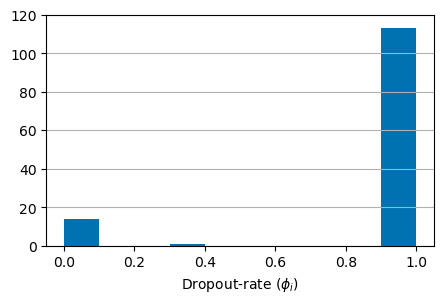

In [4]:
from matplotlib import pyplot as plt
exp.model = exp.model.cpu()
from FeatureSelection.Experiments.doc import ExperimentDoc
print(ExperimentDoc)
fig = ExperimentDoc.hist_phi(exp)
plt.show(fig)
# ExperimentDoc.hist_phi(exp)

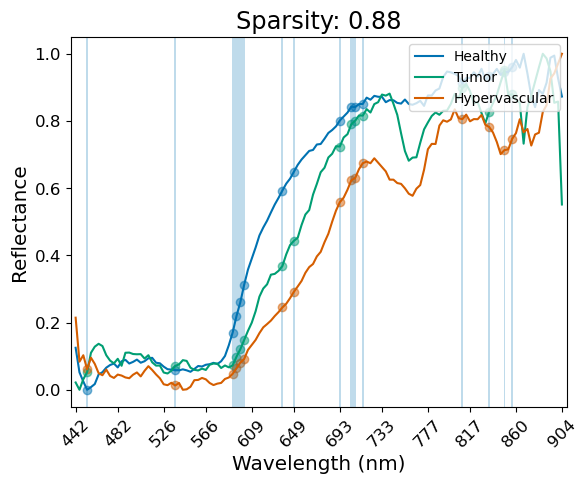

In [5]:
import numpy as np
dataset = exp.dataset
X, y = dataset[:]

# get 1 samper per class
samples = np.zeros((3, 128))
sample_labels = ['Healthy', 'Tumor', 'Hypervascular']
for i in range(0, 3):
    idx = np.where(y == i)[0][0]
    samples[i] = X[idx].numpy()

samples = dataset.transform.inverse_transform(torch.tensor(samples))
wv = np.round(dataset.wv, 0).astype(int)

fig = ExperimentDoc.plot_band_selection(exp, samples=samples, labels=sample_labels, wv=wv)
